# Importing Libraries (a)

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# (1) Data analysis

In [109]:
dataset = pd.read_csv("House Pricing.csv")
num_nan_rows = dataset.isnull().sum(axis=1).astype(bool).sum()
total_rows = dataset.shape[0]
print('Number of records in total: {}\nNumber of records that has NaN values: {}'.format(total_rows, num_nan_rows))

Number of records in total: 545
Number of records that has NaN values: 0


In [110]:
print(dataset.head(10))

      price   area  bedrooms  bathrooms  stories mainroad guestroom basement   
0  13300000   7420         4          2        3      yes        no       no  \
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      

In [111]:
print(dataset.describe())

              price          area    bedrooms   bathrooms     stories   
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000  \
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [112]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


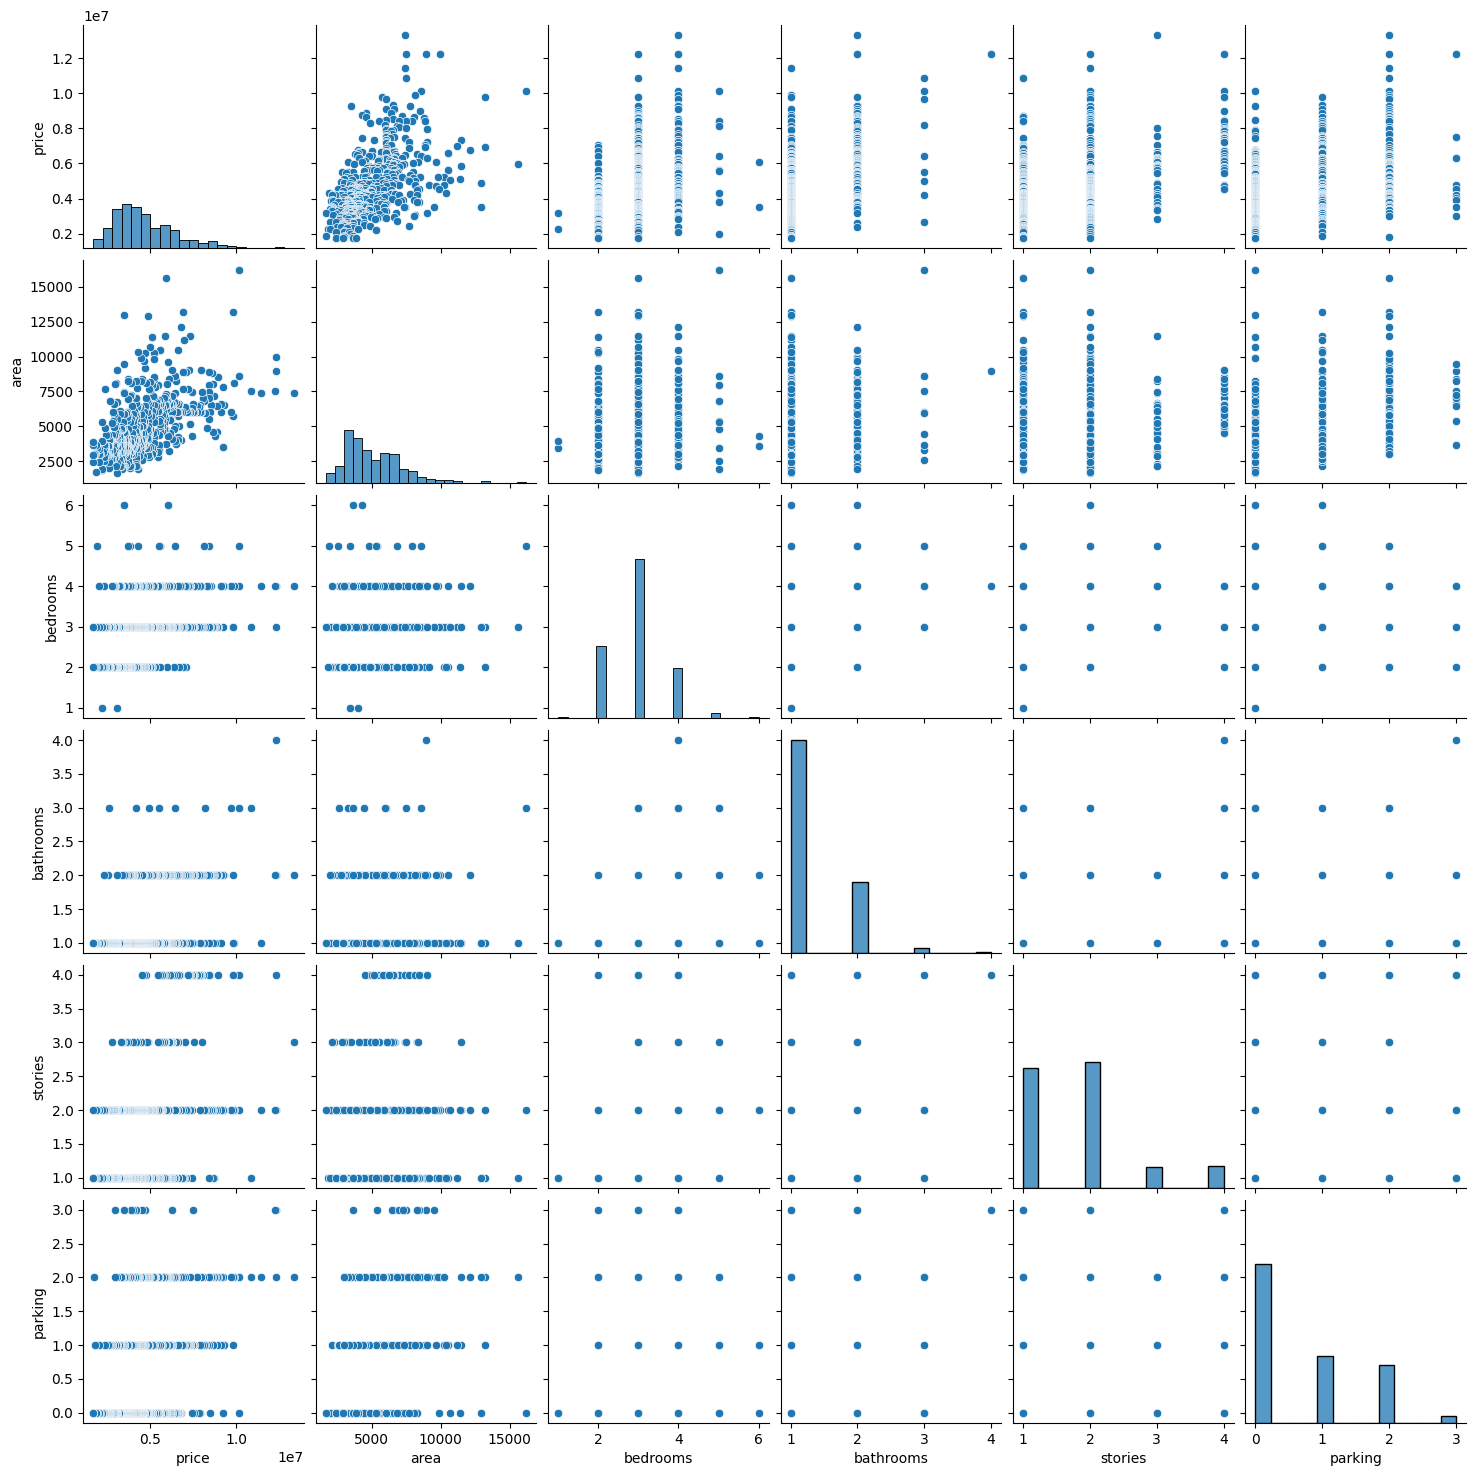

In [113]:
sns.pairplot(dataset)
plt.show()

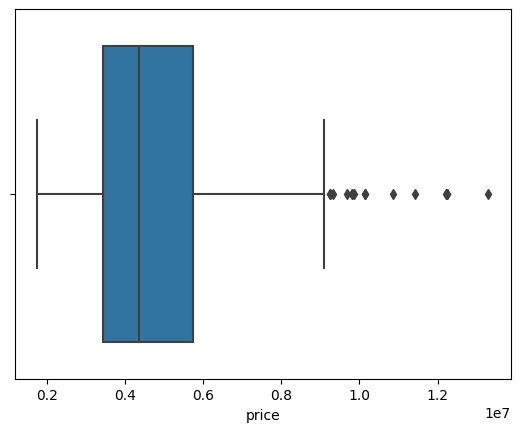

In [114]:
sns.boxplot(x='price', data=dataset)
plt.show()

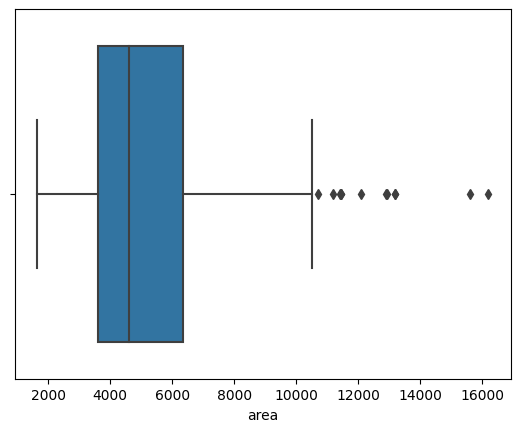

In [115]:

sns.boxplot(x='area', data=dataset)
plt.show()

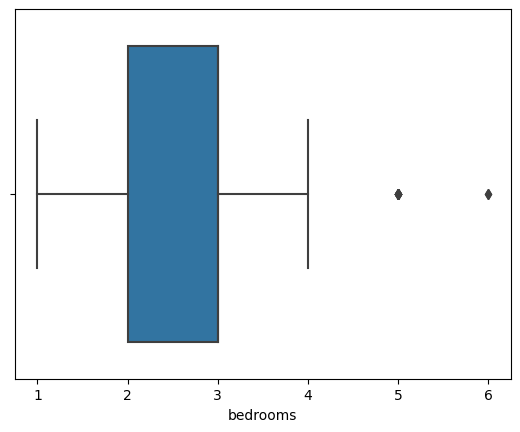

In [116]:

sns.boxplot(x='bedrooms', data=dataset)
plt.show()

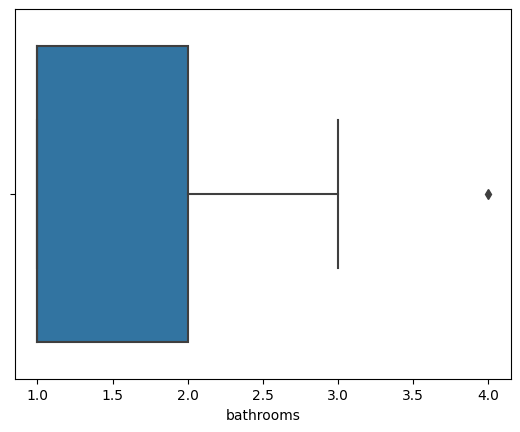

In [117]:
sns.boxplot(x='bathrooms', data=dataset)
plt.show()

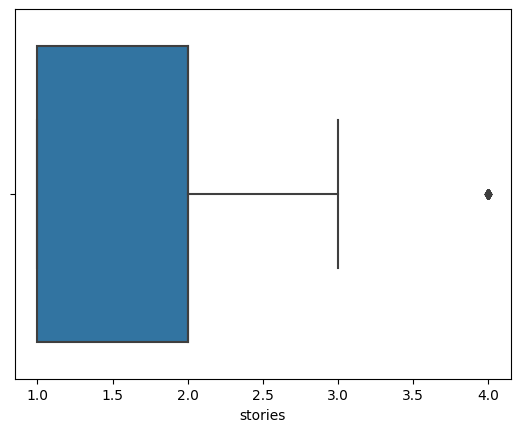

In [118]:
sns.boxplot(x='stories', data=dataset)
plt.show()

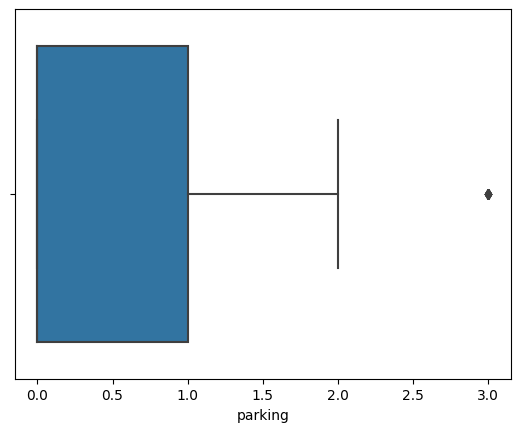

In [119]:
sns.boxplot(x='parking', data=dataset)
plt.show()

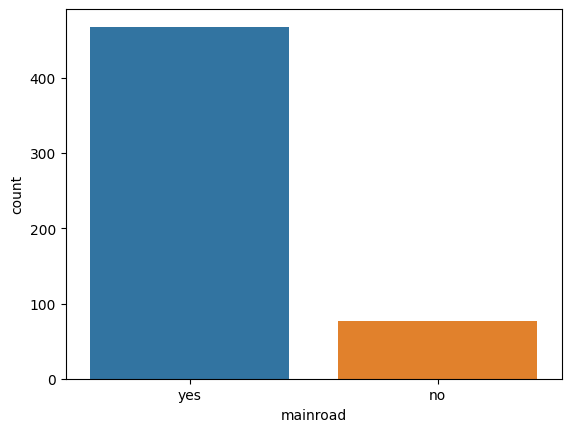

In [120]:
sns.countplot(x='mainroad', data=dataset)
plt.show()

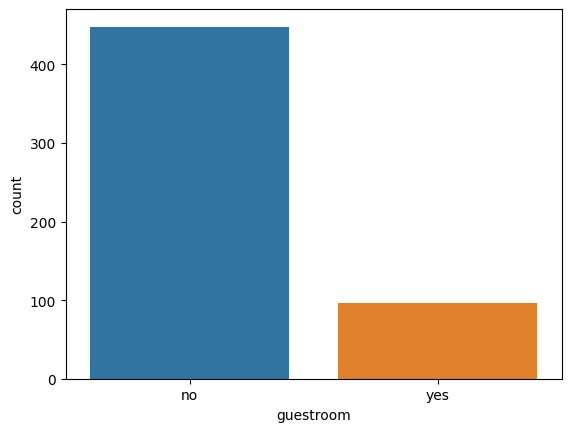

In [121]:
sns.countplot(x='guestroom', data=dataset)
plt.show()

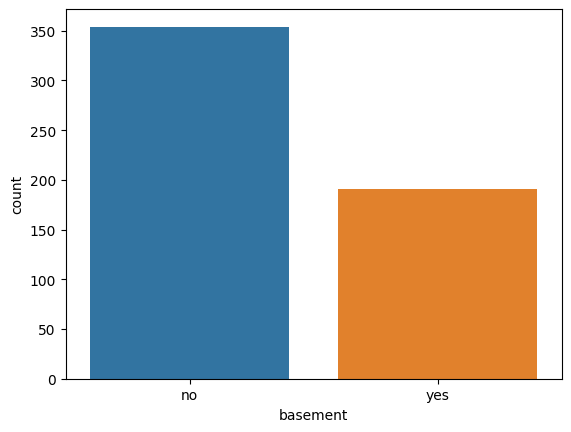

In [122]:
sns.countplot(x='basement', data=dataset)
plt.show()

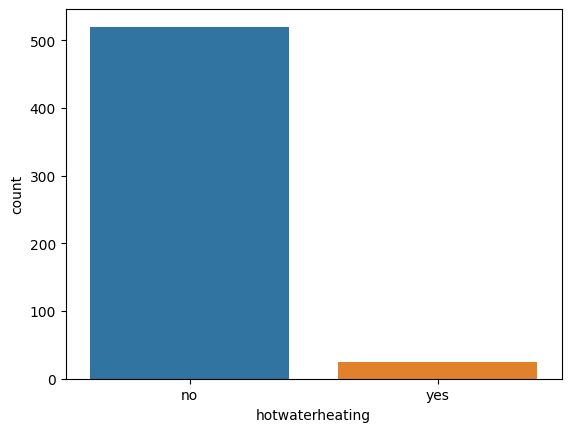

In [123]:
sns.countplot(x='hotwaterheating', data=dataset)
plt.show()

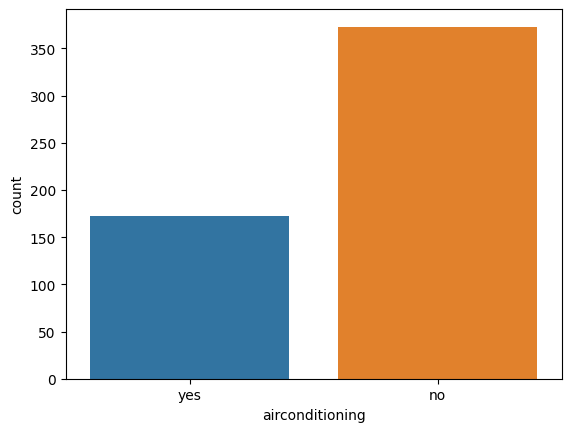

In [124]:
sns.countplot(x='airconditioning', data=dataset)
plt.show()

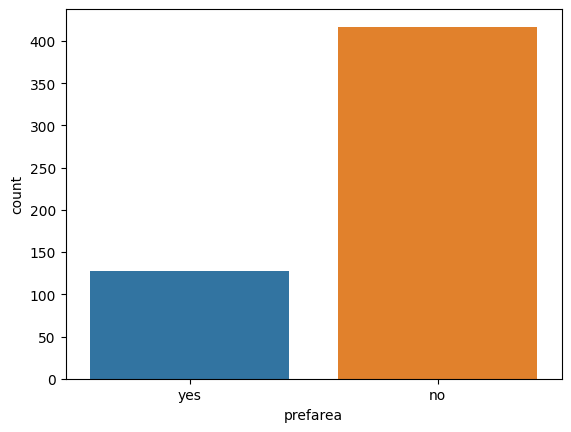

In [125]:
sns.countplot(x='prefarea', data=dataset)
plt.show()

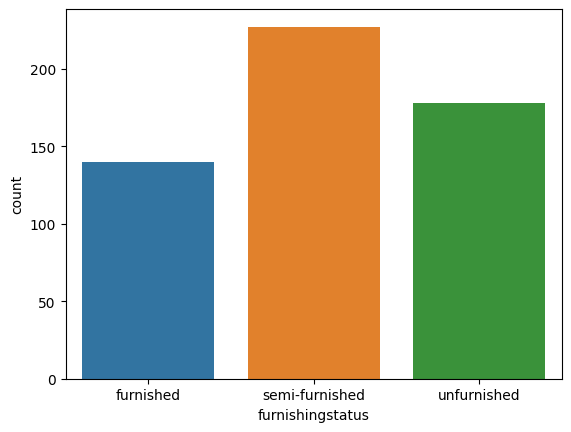

In [126]:
sns.countplot(x='furnishingstatus', data=dataset)
plt.show()

# (2) Data Preprocessing

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
dataset.dropna(inplace=True)

In [129]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [130]:
dataset = pd.get_dummies(dataset, columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

In [131]:
scaler = StandardScaler()

In [132]:
numericalFeat = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dataset[numericalFeat] = scaler.fit_transform(dataset[numericalFeat])

In [133]:
from sklearn.model_selection import train_test_split
X = dataset.drop(['price'], axis=1)
y = dataset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (3) Regression Model Development

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [135]:
reg = LinearRegression()

In [136]:
reg.fit(X_train, y_train)

LinearRegression()

In [137]:
y_train_prediction = reg.predict(X_train)
y_test_prediciton = reg.predict(X_test)

In [138]:
training_mse = mean_squared_error(y_train, y_train_prediction)
training_rmse = np.sqrt(training_mse)
training_r2 = r2_score(y_train, y_train_prediction)

In [139]:
testing_mse = mean_squared_error(y_test, y_test_prediciton)
testing_rmse = np.sqrt(testing_mse)
testing_r2 = r2_score(y_test, y_test_prediciton)

In [140]:
print('Training Set')
print('MSE:', training_mse)
print('RMSE:', training_rmse)
print('R-squared:', training_r2)

Training Set
MSE: 968358188440.7242
RMSE: 984051.9236507412
R-squared: 0.6859438988560158


In [141]:
print('\nTesting Set')
print('MSE:', testing_mse)
print('RMSE:', testing_rmse)
print('R-squared:', testing_r2)


Testing Set
MSE: 1754318687330.6685
RMSE: 1324506.9600914405
R-squared: 0.6529242642153175


# (4) HyperParameter Tuning

In [142]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [148]:
ridge = Ridge()
hyperparameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [146]:
lasso = Lasso()
hyperparameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5)
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [147]:
print('Ridge Regression')
print('Best Hyperparameters:', grid_search_ridge.best_params_)
print('Training Set R-squared:', grid_search_ridge.best_estimator_.score(X_train, y_train))
print('Testing Set R-squared:', grid_search_ridge.best_estimator_.score(X_test, y_test))

Ridge Regression
Best Hyperparameters: {'alpha': 10}
Training Set R-squared: 0.6841770150904964
Testing Set R-squared: 0.6455827364088249


In [149]:
print('\nLasso Regression')
print('Best Hyperparameters:', grid_search_lasso.best_params_)
print('Training Set R-squared:', grid_search_lasso.best_estimator_.score(X_train, y_train))
print('Testing Set R-squared:', grid_search_lasso.best_estimator_.score(X_test, y_test))


Lasso Regression
Best Hyperparameters: {'alpha': 100}
Training Set R-squared: 0.6859437113221983
Testing Set R-squared: 0.652863654974233


# (5) Final Model Evaluation

In [150]:
import matplotlib.pyplot as plt

In [151]:
y_prediction_ridge = grid_search_ridge.predict(X_test)
y_prediction_lasso = grid_search_lasso.predict(X_test)

In [152]:
print('Initial Linear Regression Model')
print('Training Set R-squared:', reg.score(X_train, y_train))
print('Testing Set R-squared:', reg.score(X_test, y_test))
print('Testing Set MSE:', mean_squared_error(y_test, y_test_prediciton))

Initial Linear Regression Model
Training Set R-squared: 0.6859438988560158
Testing Set R-squared: 0.6529242642153175
Testing Set MSE: 1754318687330.6685


In [153]:
print('\nRidge Regression Model')
print('Training Set R-squared:', grid_search_ridge.best_estimator_.score(X_train, y_train))
print('Testing Set R-squared:', grid_search_ridge.best_estimator_.score(X_test, y_test))
print('Testing Set MSE:', mean_squared_error(y_test, y_prediction_ridge))


Ridge Regression Model
Training Set R-squared: 0.6841770150904964
Testing Set R-squared: 0.6455827364088249
Testing Set MSE: 1791426955344.1885


In [154]:
print('\nLasso Regression Model')
print('Training Set R-squared:', grid_search_lasso.best_estimator_.score(X_train, y_train))
print('Testing Set R-squared:', grid_search_lasso.best_estimator_.score(X_test, y_test))
print('Testing Set MSE:', mean_squared_error(y_test, y_prediction_lasso))


Lasso Regression Model
Training Set R-squared: 0.6859437113221983
Testing Set R-squared: 0.652863654974233
Testing Set MSE: 1754625040997.3079


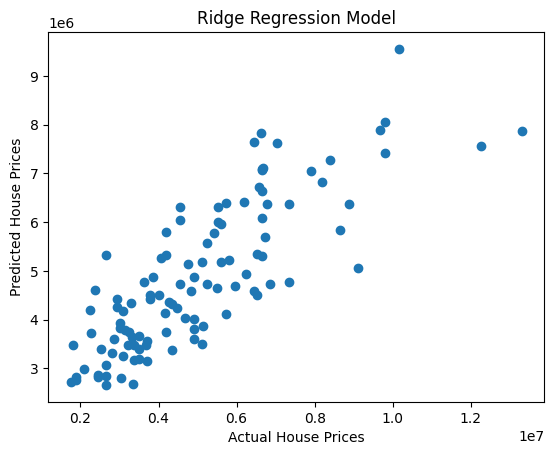

In [155]:
plt.scatter(y_test, y_prediction_ridge)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Ridge Regression Model')
plt.show()

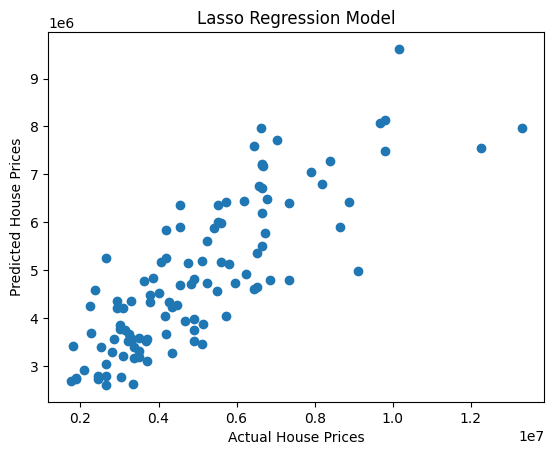

In [157]:
plt.scatter(y_test, y_prediction_lasso)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Lasso Regression Model')
plt.show()